# DAND Wrangle And Analyze Data Project

### By Hamad Sami Al-Assafi

## Table Of Content

<ul>
     <li>
        <a href = '#intro'>Introduction</a>
    </li>
    <li>
        <a href = '#gather'>Gathering</a>
    </li>
    <li>
       <a href = '#assess'> Assessing </a>
    </li>
    <li>
        <a href = '#clean'> Cleaning </a>
    </li>
     <li>
        <a href = '#ana'> Analysis </a>
    </li>
    </ul>

<a id='intro'></a>
## Introduction

**In this project I will take three steps to wrangle dataset from weRateDog account in twitter the three steps are :**


**1-Gathering Data: In this step I will gather data from multiple resources that i must have to complete this project**

**2-Assessing Data: In this step I will look through the data that i have gathered and see if there is any quailty or tidness issues in the dataset that i gathered if there is any issues i will document it**

**3-Cleaning Data: The last step in wrangeling process, in this step i will transfer the documentation that i have in the assessing step to code to clean our dataset, in this step i will use (Define, Code, Test) methodology**


**Then our dataset will become somehow clean!, afterward I will go through the analysis process**

In [7]:
#Import the libraries that i will used for now
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json

<a id = "gather"> </a>

## Gathering

### Twitter Archive

In [2]:
# Reading the csv file and save it in dataframe called (df1), and show the head of the dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### TSV file for the images

In [3]:
# I have imported requests library and get the (TSV) file 
import requests as rq
r = rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
# create file and put the (TSV) content on it
import os
with open ('image_predictions.tsv','wb') as file:
    file.write(r.content)

In [5]:
# Read the (TSV) file and store it in the dataframe called (df2)
df2 = pd.read_csv('image_predictions.tsv', '\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API 

In [8]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

df_list = []

with open('tweet-json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list.append({'tweet_id': tweet_line['id'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count']})
        
twitter_api = pd.DataFrame(df_list)
twitter_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [44]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
     #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

<a id = "assess"> </a>
## Assessing

### Visual assessment

**Twitter Archive**

In [48]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**We Have in twitter archive dataframe (2356) row and (17) column. We will go through each column in this dataset from the left to the right**

**1-The Tweet ID**

**2-If the tweet is reply tweet then it should have it unique ID**

**3-If the tweet is a reply tweet then the value will be an integer of the original Tweet’s author id**

**4-When the author has published the tweet**

**5-The source of the tweet (whether it has been tweeted from Phone Computer etc..)**

**6-The content of the tweet**

**7-It shows what tweet has been retweeted based on tweet ID**

**8-ID for the person who retweet that certain tweet**

**9-When the tweet has been retweeted**

**10-Tweet URL**

**11-The number at top of fraction that shows the rating**

**12-The number at bottom of fraction that shows the rating**

**13-The name of the dog**

**14&15&16&17- Different criteria for the dogs that determine their age and their type**

**Image Predictions**

In [55]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**We Have in Image predictions dataframe (2075) row and (12) column. We will go through each column in this dataset from the left to the right**


**1-The Tweet ID**

**2-Image(s) for the dog that in tweet**

**3-Number of images in each tweet**

**4- Is the algorithm's #1 prediction for the image in the tweet**

**5-Is how confident the algorithm is in its #1 prediction**

**6-Is whether or not the #1 prediction is a breed of dog**

**7-Is the algorithm's second most likely prediction**

**8-Is how confident the algorithm is in its #2 prediction**

**9-Is whether or not the #2 prediction is a breed of dog**

**10-Is the algorithm's third most likely prediction**

**11-Is how confident the algorithm is in its #3 prediction**

**12-Is whether or not the #3 prediction is a breed of dog**



**Twitter API**

In [53]:
twitter_api

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


**We Have in Twitter API dataframe (2354) row and (3) column. We will go through each column in this dataset from the left to the right**


**1-The Tweet ID**

**2-How many people click the favorite button for the tweet**

**3-How many people click the retweet button for the tweet**

### Programmatic Assessment

**Twitter Archive**

In [57]:
df1.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [59]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [149]:
df1.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2191,668955713004314625,nan,nan,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,nan,nan,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None
699,786286427768250368,nan,nan,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,nan,nan,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
1474,693644216740769793,693642232151285760.000,4196983835.000,2016-01-31 03:57:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",BREAKING PUPDATE: I've just been notified that...,nan,nan,NaN,NaN,10,10,None,None,None,None,None
63,879862464715927552,nan,nan,2017-06-28 00:42:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,nan,nan,NaN,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,None,None,None,None
1307,707315916783140866,nan,nan,2016-03-08 21:23:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finnegus. He's trapped in a snow globe...,nan,nan,NaN,https://twitter.com/dog_rates/status/707315916...,10,10,Finnegus,None,None,pupper,None
1644,683852578183077888,nan,nan,2016-01-04 03:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tiger. He's a penbroke (little do...,nan,nan,NaN,https://twitter.com/dog_rates/status/683852578...,10,10,Tiger,None,None,None,None
207,852553447878664193,nan,nan,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,nan,nan,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
1825,676470639084101634,nan,nan,2015-12-14 18:35:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,nan,nan,NaN,https://twitter.com/dog_rates/status/676470639...,11,10,None,None,None,pupper,None
472,816450570814898180,nan,nan,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,nan,nan,NaN,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
2294,667138269671505920,nan,nan,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,nan,nan,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None


In [148]:
df1.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Simba        1
Gustaf       1
Mauve        1
Cuddles      1
Kaia         1
Name: name, Length: 957, dtype: int64

In [78]:
df1.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [90]:
df1.query("name == 'Cooper'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None
607,798209839306514432,NaN,NaN,2016-11-14 17:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. His bow tie was too heavy for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798209839...,13,10,Cooper,None,None,None,None
910,757611664640446465,NaN,NaN,2016-07-25 16:21:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757611664...,12,10,Cooper,None,None,None,None
961,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,None,None,None,puppo
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He basks in the glory of rebel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489...,9,10,Cooper,None,None,None,None
1333,705442520700944385,NaN,NaN,2016-03-03 17:19:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,None,None,None,None
1395,699801817392291840,NaN,NaN,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,pupper,None


In [98]:
df1.query("rating_denominator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [99]:
df1.query("name == 'this'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [136]:
df1.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,832087547559997440.000,30582082.000,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,nan,nan,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,nan,nan,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,nan,nan,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,nan,nan,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",740373189193256960.000,4196983835.000,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,nan,nan,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,nan,nan,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,nan,nan,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",nan,nan,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,nan,nan,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,nan,nan,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,nan,nan,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,nan,nan,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,nan,nan,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,nan,nan,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,nan,nan,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,nan,nan,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,nan,nan,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,nan,nan,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [137]:
df1.round(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [142]:
sum(df1.expanded_urls.isnull())

59

In [87]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [62]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
180,669327207240699904,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,golden_retriever,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,0.010216,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True
1212,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [88]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [116]:
df2.round(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.597,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.556,True,English_springer,0.226,True,German_short-haired_pointer,0.175,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170,False,Labrador_retriever,0.168,True,spatula,0.041,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716,True,malamute,0.078,True,kelpie,0.031,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.324,True,Pekinese,0.091,True,papillon,0.069,True


In [124]:
df2.jpg_url.value_counts()

https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg    2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg    2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg    2
                                                  ..
https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg    1
https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg    1
https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg    1
https://pbs.twimg.com/media/CdnnZhhWAAEAoUc.jpg    1
https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [126]:
df2.query('jpg_url == "https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372,True,Chesapeake_Bay_retriever,0.137,True,malamute,0.071,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372,True,Chesapeake_Bay_retriever,0.137,True,malamute,0.071,True


In [130]:
df2.query('jpg_url == "https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967,True,golden_retriever,0.017,True,ice_bear,0.015,False
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967,True,golden_retriever,0.017,True,ice_bear,0.015,False


In [65]:
twitter_api.head(10)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [66]:
twitter_api.sample(10)

,tweet_id,favorites,retweets
1333,705239209544720384,3290,854
1507,691459709405118465,4449,1294
985,749036806121881602,3425,896
602,798628517273620480,0,2272
2335,666268910803644416,108,37
1813,676613908052996102,1183,219
2303,666837028449972224,857,584
2071,670995969505435648,1175,317
1672,682259524040966145,4578,1375
674,789530877013393408,13188,3942


In [67]:
twitter_api.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [68]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality Issues 
#### Twitter Archive Dataset:
**1-In twitter archive dataset we should remove the (a) tag and make the column contain the (URL) for the source of tweet only**

**2-There are (55) dog who have no name and their name recorded as letter (a) in twitter archive dataset**

**3-There are duplicate tweet with tweet ID (868552278524837888) & (868639477480148993)**


**4-There are an issue in tweet ID (740373189193256964) because the actual rating is (14/10) not (9/11)**

**5-There are an issue in tweet ID (722974582966214656) because the actual rating is (13/10) not (4/20)**

**6-There are an issue in tweet ID (731156023742988288) because in the dataset their name is recorded as (this) but the actual tweet did not mention any name of the dogs, and in the tweet ID (748575535303884801) the dog has no name in the tweet and it recorded as (one)**

**7-Timestamp should be converted to datetime**

**8-After creating the new column which is (Rating) column I should drop the (rating_numerator) column & (rating_denominator) column, because we do not need them**

**9-There is (59) row that does not have expanded_url, and they are not useful so, we should drop them**

**10-The names and type that is unavailable should be (null) aka NAN insted of (None)**

**11-Change source data type to category**
#### Image Prediction Dataset:
**12-There are too many duplicate tweet (818588835076603904) & (773547596996571136), (739544079319588864) & (759566828574212096)**

**13-img_num column should be converted to category date type**

### Tidiness Issues 

**1-In twitter archive dataset we should create new column called (Rating) insted of two column, and that column will be created based on the  (rating_numerator) column & (rating_denominator) column**

**2-In twitter archive dataset we should have one column insted of having four columns for each type and we should call that column is (type)** 

**3-Create master dataframe that merge all the dataframes togther**

<a id = "clean"> </a>
## Cleaning

In [36]:
#Make copies of the orignal dataframe for cleaning step
df_archives = df1.copy()
df_img = df2.copy()
df_api = twitter_api.copy()

### Quality Issues 
#### Twitter Archive Dataset:
#### Define 
**drop the (59) missing value of expanded_urls column**

#### Code

In [37]:
df_archives.dropna(subset = ['expanded_urls'] , inplace = True)

#### Test

In [38]:
sum(df_archives.expanded_urls.isnull())

0

#### Define
**convert timestamp data type from string aka (object) to datetime using pandas method (to_datetime)**

#### Code

In [39]:
df_archives.timestamp =  pd.to_datetime(df_archives['timestamp'])

#### Test

In [40]:
df_archives.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

#### Define
**Strip the Anchor tag from the source column and keep the content between the tags using lamada and apply method**

#### Code

In [42]:
import re
df_archives.source = df_archives.source.apply(lambda x: re.sub('<[^<]+?>', '', x))

#### Test

In [43]:
df_archives.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2258,667724302356258817,NaN,NaN,2015-11-20 15:20:54+00:00,Twitter Web Client,What a dog to start the day with. Very calm. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08+00:00,Twitter for iPhone,C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,None,None,None,None,None
1665,682750546109968385,NaN,NaN,2016-01-01 02:29:49+00:00,Twitter for iPhone,Meet Taco. He's a speckled Garnier Fructis. Lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682750546...,9,10,Taco,None,None,None,None
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41+00:00,Twitter for iPhone,This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,None,None,None,None
1870,675149409102012420,NaN,NaN,2015-12-11 03:05:37+00:00,Twitter for iPhone,holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,12,10,None,None,None,None,None
1229,713761197720473600,NaN,NaN,2016-03-26 16:15:05+00:00,Twitter for iPhone,This is Piper. She would really like that tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713761197...,12,10,Piper,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22+00:00,Twitter for iPhone,This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
1428,697616773278015490,NaN,NaN,2016-02-11 03:02:54+00:00,Twitter for iPhone,This pupper doubles as a hallway rug. Very rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697616773...,11,10,None,None,None,pupper,None


#### Define
**we should replace any dog who have letter (a) as name to (None) for now, we can make it using (replace) method)**

#### Code

In [45]:
df_archives.name = df_archives.name.str.replace('a', 'None')

#### Test

In [47]:
df_archives.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
**There are duplicate tweet with tweet ID (868552278524837888) & (868639477480148993) and we should delete one of them using drop method in pandas**

#### Code

In [48]:
df_archives.query('tweet_id == 868552278524837888 or tweet_id == 868639477480148993')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04+00:00,Twitter for iPhone,RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34+00:00,Twitter for iPhone,Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None


In [56]:
df_archives = df_archives[df_archives['tweet_id'] != 868639477480148993]

#### Test

In [57]:
df_archives.query('tweet_id == 868639477480148993')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
**Replace the rating_numerator from (9) to (14) & rating_denominator from (11) to (10) with the tweet ID (740373189193256964), we could use loc function in pandas**

#### Code

In [66]:
df_archives.query('tweet_id == 740373189193256964')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [87]:
df_archives.loc[df_archives['tweet_id'] == 740373189193256964, 'rating_numerator'] = 14
df_archives.loc[df_archives['tweet_id'] == 740373189193256964, 'rating_denominator'] = 10

#### Test

In [88]:
df_archives.query('tweet_id == 740373189193256964')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


#### Define
**Replace the rating_numerator from (4) to (13) & rating_denominator from (20) to (10) with the tweet ID (722974582966214656), we could use loc function in pandas**

#### Code

In [70]:
df_archives.query('tweet_id == 722974582966214656')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None,NaN,NaN


In [76]:
df_archives.loc[df_archives['tweet_id'] == 722974582966214656, 'rating_numerator'] = 13
df_archives.loc[df_archives['tweet_id'] == 722974582966214656, 'rating_denominator'] = 10

#### Test

In [77]:
df_archives.query('tweet_id == 722974582966214656')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None,13.0,10.0


In [83]:
### I have created another rating by mistake (Because i have put space at the beginning) and here I'm going to delete them
df_archives.drop(' rating_numerator', axis = 1, inplace = True)
df_archives.drop(' rating_denominator', axis = 1, inplace = True)

In [84]:
df_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,PhineNones,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,DNonerlNone,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,FrNonenklin,None,None,None,None


#### Define
**Name issue in Tweet ID (731156023742988288) & Tweet ID (748575535303884801), colud be solved by replace method in pandas**

#### Code

In [89]:
df_archives.query('tweet_id == 731156023742988288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [90]:
df_archives.query('tweet_id == 748575535303884801')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50+00:00,Twitter for iPhone,This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None


In [91]:
df_archives.name = df_archives.name.replace('this' , 'None')
df_archives.name = df_archives.name.replace('one' , 'None')

#### Test

In [92]:
df_archives.query('tweet_id == 731156023742988288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,None,None,None


In [93]:
df_archives.query('tweet_id == 748575535303884801')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50+00:00,Twitter for iPhone,This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,None,None,None,None,None


#### Define
**The names and type that is unavailable should be (null) aka NAN insted of (None), we can convert them using (replace) method in pandas and NaN function in numpy**

#### Code

In [98]:
df_archives = df_archives.replace('None',np.NaN)

#### Test

In [101]:
df_archives.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2032,671763349865160704,NaN,NaN,2015-12-01 18:50:38+00:00,Twitter for iPhone,Say hello to Mark. He's a good dog. Always rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671763349...,9,10,MNonerk,NaN,NaN,NaN,NaN
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19+00:00,Twitter for iPhone,RT @dog_rates: Everybody look at this beautifu...,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,https://twitter.com/dog_rates/status/679828447...,13,10,NaN,NaN,NaN,pupper,NaN
519,810284430598270976,NaN,NaN,2016-12-18 00:43:57+00:00,Twitter for iPhone,This is Phil. He's a father. A very good fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810284430...,13,10,Phil,NaN,NaN,NaN,NaN
802,772193107915964416,NaN,NaN,2016-09-03 22:02:38+00:00,Twitter for iPhone,This is Willem. He's a Penn State pupper. Thin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772193107...,12,10,Willem,NaN,NaN,pupper,NaN


#### Define
**Change Source Column to category data type using using astype method**

#### Code

In [102]:
df_archives.source = df_archives.source.astype('category')

#### Test

In [112]:
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2296 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2296 non-null   datetime64[ns, UTC]
 4   source                      2296 non-null   category           
 5   text                        2296 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2296 non-null   object             
 10  rating_numerator            2296 non-null   int64           

#### Define
**After I have created the Rating column i should drop rating_numerator & rating_denominator using drop method in pandas**

#### Code

In [113]:
df_archives.drop('rating_numerator', axis = 1, inplace = True)
df_archives.drop('rating_denominator', axis = 1, inplace = True)

#### Test

In [114]:
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2296 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2296 non-null   datetime64[ns, UTC]
 4   source                      2296 non-null   category           
 5   text                        2296 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2296 non-null   object             
 10  name                        1550 non-null   object          

#### Image prediction Dataset

#### Define
**Duplicate tweets with tweet ID (818588835076603904) & (773547596996571136), (739544079319588864) & (759566828574212096)**

#### Code

In [105]:
df_img.query("tweet_id == 818588835076603904 or tweet_id == 773547596996571136 or tweet_id == 739544079319588864 or tweet_id == 759566828574212096")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True


In [106]:
df_img = df_img[df_img['tweet_id'] != 818588835076603904]
df_img = df_img[df_img['tweet_id'] != 739544079319588864]

#### Test

In [107]:
df_img.query("tweet_id == 818588835076603904 or tweet_id == 773547596996571136 or tweet_id == 739544079319588864 or tweet_id == 759566828574212096")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True


#### Define
**Change img_num column to category data type using astype method in pandas**

#### Code

In [108]:
df_img.img_num = df_img.img_num.astype('category')

#### Test

In [109]:
df_img.dtypes

tweet_id       int64
jpg_url       object
img_num     category
p1            object
p1_conf      float64
p1_dog          bool
p2            object
p2_conf      float64
p2_dog          bool
p3            object
p3_conf      float64
p3_dog          bool
dtype: object

## Tidiness Issues

#### Define
**Subtract rating_numerator from rating_denominator	and create new column called rating insted of two column**

#### Code

In [110]:
df_archives['Rating'] = df_archives.rating_numerator - df_archives.rating_denominator

#### Test

In [111]:
df_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,PhineNones,NaN,NaN,NaN,NaN,3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,DNonerlNone,NaN,NaN,NaN,NaN,3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,FrNonenklin,NaN,NaN,NaN,NaN,2


#### Define
**Create one column for the type of the dogs and call it (type) insted of four columns, and drop them afterward**

#### Code

In [115]:
# Creating and merging dog Levels into one column.
df_archives['type'] = df_archives.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the columns that we dont need any more
df_archives.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [120]:
df_archives.type.value_counts()

pupper     263
doggo       90
puppo       34
floofer      4
Name: type, dtype: int64

#### Define
**Create master Dataframe that contains all the dataframes togther using merge method in pandas**

#### Code

In [121]:
df_temp = pd.merge(df_archives, df_api, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')


df_master = pd.merge(df_temp, df_img, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

#### Test

In [123]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2071 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2071 non-null   datetime64[ns, UTC]
 4   source                      2071 non-null   category           
 5   text                        2071 non-null   object             
 6   retweeted_status_id         78 non-null     float64            
 7   retweeted_status_user_id    78 non-null     float64            
 8   retweeted_status_timestamp  78 non-null     object             
 9   expanded_urls               2071 non-null   object             
 10  name                        1435 non-null   object          

## Store the master dataframe into (CSV) file and use it in the analysis process

In [124]:
df_master.to_csv('twitter_archive_master.csv', index=False)


## Wrangeling process has finished at this point, then we will start the analysis process
<a id = "ana"> </a>
## Analysis

### Question 1 what are the most source of the tweets in our dataset ?

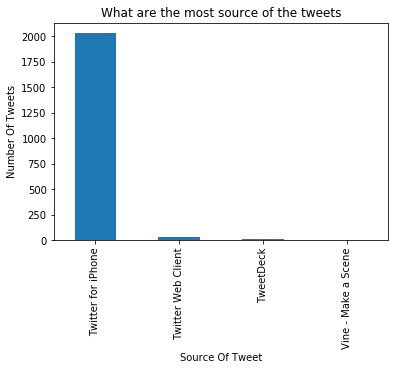

In [141]:
most_source = df_master.source.value_counts()

most_source.plot(kind = 'bar');
plt.xlabel('Source Of Tweet');
plt.ylabel('Number Of Tweets');
plt.title('What are the most source of the tweets');

### Question 2 what are the most image number in each tweet

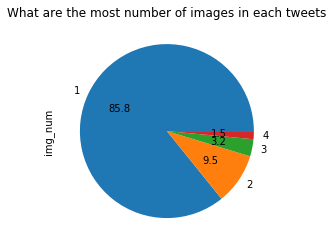

In [144]:
most_source = df_master.img_num.value_counts()

most_source.plot(kind = 'pie', autopct='%.1f');
plt.title('What are the most number of images in each tweets');

### Question 3 What is the most popular type of dog in our dataset

In [138]:
most_popular = df_master.type.value_counts()

print(most_popular)

pupper     229
doggo       75
puppo       29
floofer      3
Name: type, dtype: int64


### Question 4 What is the average rating of the dogs?

In [145]:
avg_rate = df_master.Rating.mean()

print(avg_rate)

1.7672621921776919


In [146]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0